In [1]:
# write a code to print and analysis the gps data that format as:Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,latitude,longitude,altitude,utm_easting,utm_northing,zone,letter,hdop,gpgga_read
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


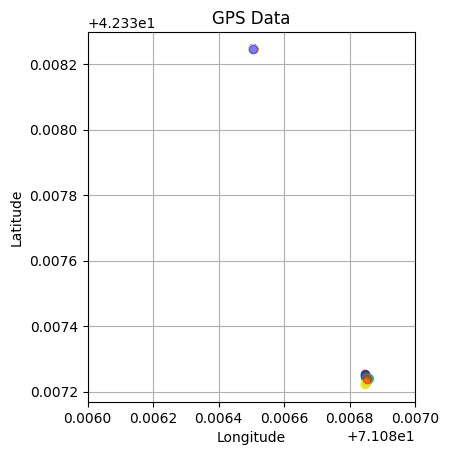

In [15]:
file_stationary = '/home/harry/catkin_ws/2024-02-12-16-00-23/gps_driver.csv'
data = pd.read_csv(file_stationary)

secs = np.array(data['header.stamp.secs'])
latitude = np.array(data['latitude'])
longitude = np.array(data['longitude'])
altitude = np.array(data['altitude'])

file_stationary_occuluded = '/home/harry/catkin_ws/2024-02-12-16-42-19/gps_driver.csv'
data_occuluded = pd.read_csv(file_stationary_occuluded)

secs_occuluded = np.array(data_occuluded['header.stamp.secs'])
latitude_occuluded = np.array(data_occuluded['latitude'])
longitude_occuluded = np.array(data_occuluded['longitude'])
altitude_occuluded = np.array(data_occuluded['altitude'])

fig, ax = plt.subplots()

#occuluded
ax.scatter(longitude_occuluded, latitude_occuluded, c=secs_occuluded, cmap='viridis', alpha=0.5)
ax.scatter(longitude_occuluded.mean(), latitude_occuluded.mean(), c='red', alpha=0.5)

#open
ax.scatter(longitude, latitude, c=secs, cmap='hot', alpha=0.5)
ax.scatter(longitude.mean(), latitude.mean(), c='blue', alpha=0.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('GPS Data')
ax.set_xlim([71.086, 71.087])
# ax.set_ylim([42.335, 42.338])
ax.grid(True)
ax.set_aspect('equal')
plt.show()


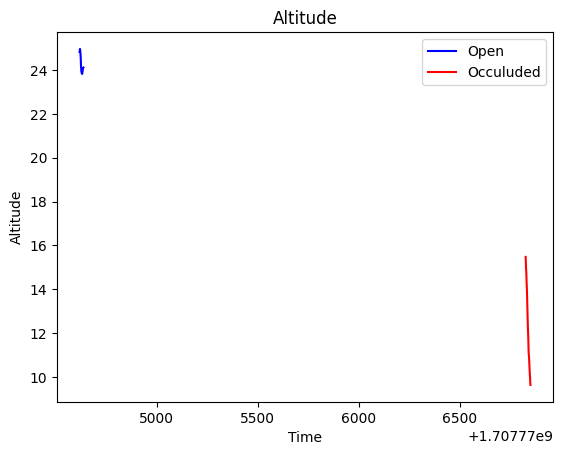

In [16]:
fig, ax = plt.subplots()
ax.plot(secs, altitude, label='Open', color='blue')
ax.plot(secs_occuluded, altitude_occuluded, label='Occuluded', color='red')
ax.set_title('Altitude')
ax.set_xlabel('Time')
ax.set_ylabel('Altitude')
ax.legend()
plt.show()

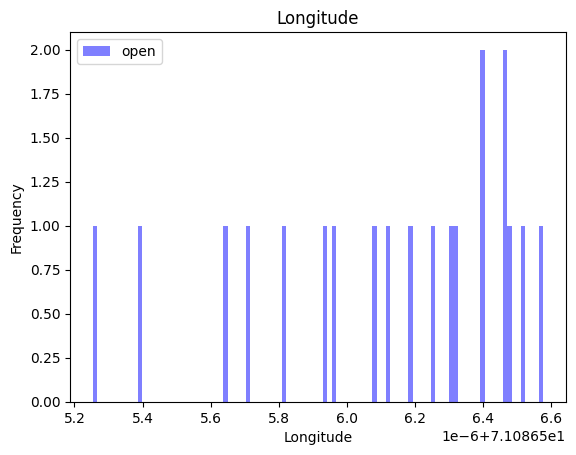

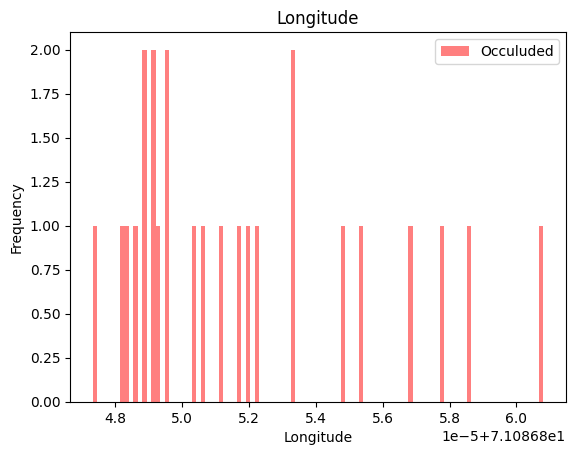

In [22]:
fig, ax = plt.subplots()
ax.hist(longitude, bins=100, alpha=0.5, label='open', color='blue')
ax.set_title('Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(longitude_occuluded, bins=100, alpha=0.5, label='Occuluded', color='red')
ax.set_title('Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()



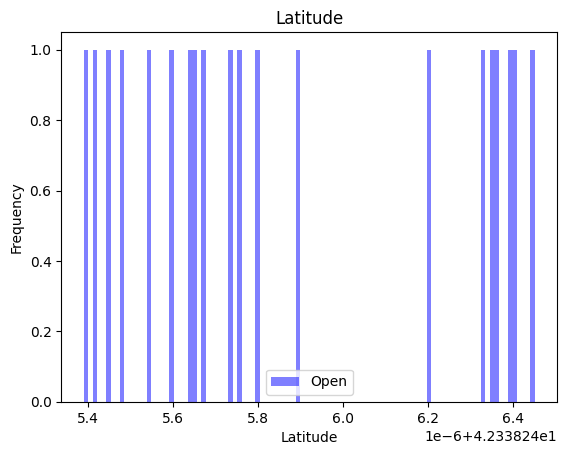

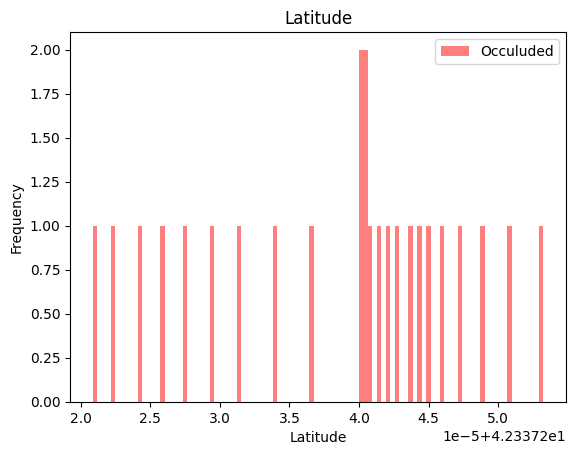

In [23]:
fig, ax = plt.subplots()
ax.hist(latitude, bins=100, alpha=0.5, label='Open', color='blue')
ax.set_title('Latitude')
ax.set_xlabel('Latitude')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(latitude_occuluded, bins=100, alpha=0.5, label='Occuluded', color='red')
ax.set_title('Latitude')
ax.set_xlabel('Latitude')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()


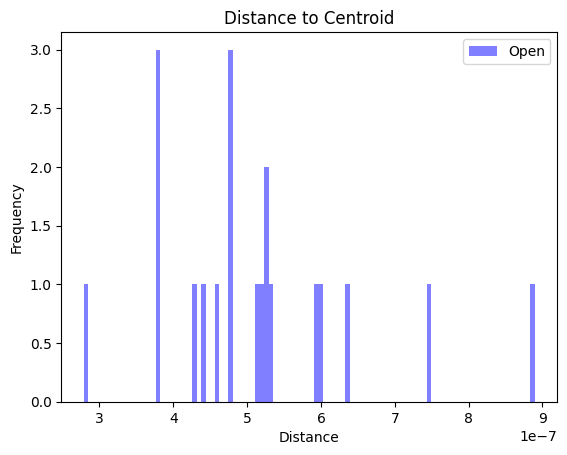

In [24]:
centroid = np.array([longitude.mean(), latitude.mean()])
distance = np.sqrt((longitude - centroid[0])**2 + (latitude - centroid[1])**2)

fig, ax = plt.subplots()
ax.hist(distance, bins=100, alpha=0.5, label='Open', color='blue')
ax.set_title('Distance to Centroid')
ax.set_xlabel('Distance')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()


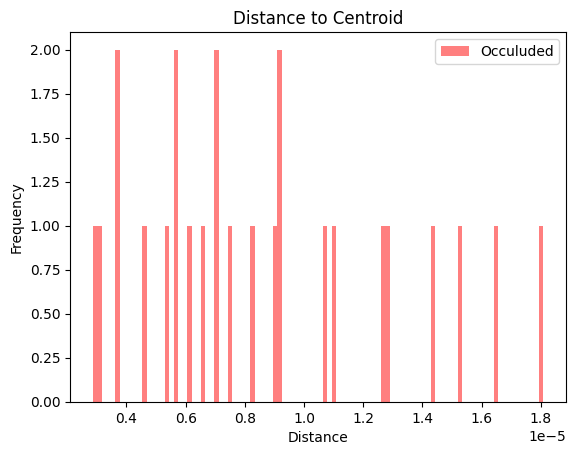

In [25]:
centroid_occuluded = np.array([longitude_occuluded.mean(), latitude_occuluded.mean()])
distance_occuluded = np.sqrt((longitude_occuluded - centroid_occuluded[0])**2 + (latitude_occuluded - centroid_occuluded[1])**2)

fig, ax = plt.subplots()
ax.hist(distance_occuluded, bins=100, alpha=0.5, label='Occuluded', color='red')
ax.set_title('Distance to Centroid')
ax.set_xlabel('Distance')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

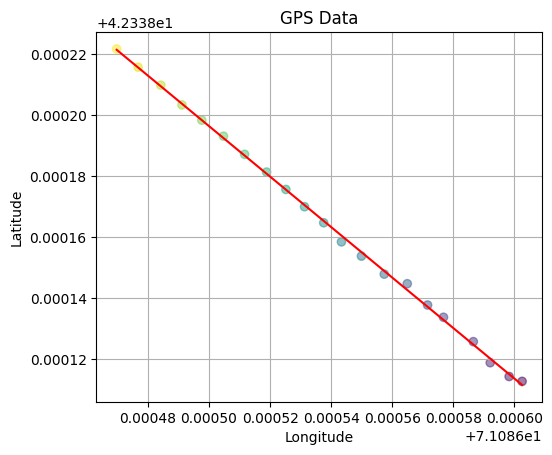

In [27]:
moving_data = '/home/harry/catkin_ws/2024-02-12-16-50-05/gps_driver.csv'
data_moving = pd.read_csv(moving_data)

secs_moving = np.array(data_moving['header.stamp.secs'])
latitude_moving = np.array(data_moving['latitude'])
longitude_moving = np.array(data_moving['longitude'])
altitude_moving = np.array(data_moving['altitude'])

fig, ax = plt.subplots()
ax.scatter(longitude_moving, latitude_moving, c=secs_moving, cmap='viridis', alpha=0.5)
m, b = np.polyfit(longitude_moving, latitude_moving, 1)
ax.plot(longitude_moving, m*longitude_moving + b, color='red')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('GPS Data')
# ax.set_xlim([-71.089, -71.086])
# ax.set_ylim([42.335, 42.338])
ax.grid(True)
ax.set_aspect('equal')
plt.show()

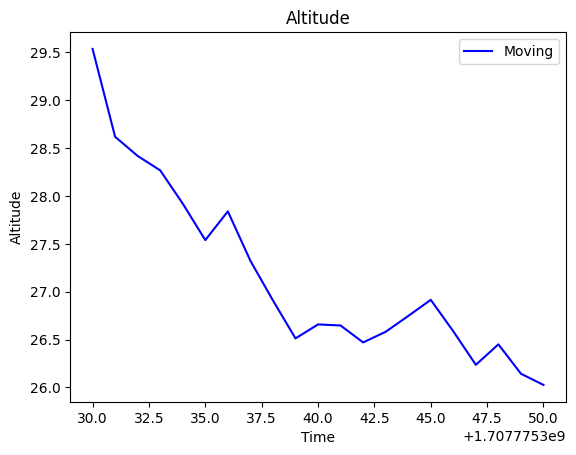

In [28]:
# Moving data altitude vs. time plot
fig, ax = plt.subplots()
ax.plot(secs_moving, altitude_moving, label='Moving', color='blue')
ax.set_title('Altitude')
ax.set_xlabel('Time')
ax.set_ylabel('Altitude')
ax.legend()
plt.show()